In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix 


In [2]:
data=pd.read_csv("F:/MachineLearing/placementdata.csv")
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [4]:
print(data.shape)

(10000, 12)


In [5]:
data.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [6]:
# Initialize LabelEncoders
from sklearn.preprocessing import LabelEncoder
n_PlacementStatus = LabelEncoder()
# Apply transformations
data['PlacementStatus_new'] = n_PlacementStatus.fit_transform(data['PlacementStatus'])

# Display the first few rows
print(data.head())

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  PlacementStatus_new  
0                No         61         79       NotPlaced                    0  
1 

In [7]:
data_new=data.drop(['ExtracurricularActivities', 'PlacementTraining','PlacementStatus'],axis='columns')
data_new.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,PlacementStatus_new
0,1,7.5,1,1,1,65,4.4,61,79,0
1,2,8.9,0,3,2,90,4.0,78,82,1
2,3,7.3,1,2,2,82,4.8,79,80,0
3,4,7.5,1,1,2,85,4.4,81,80,1
4,5,8.3,1,2,2,86,4.5,74,88,1


In [8]:
#Assingning dependent and independent variables
x=data_new.iloc[:,1:-1].values
y=data_new.iloc[:,-1].values
display(x.shape,y.shape)

(10000, 8)

(10000,)

In [9]:
x

array([[ 7.5,  1. ,  1. , ...,  4.4, 61. , 79. ],
       [ 8.9,  0. ,  3. , ...,  4. , 78. , 82. ],
       [ 7.3,  1. ,  2. , ...,  4.8, 79. , 80. ],
       ...,
       [ 8.4,  1. ,  3. , ...,  4.8, 79. , 81. ],
       [ 8.9,  0. ,  3. , ...,  4.8, 71. , 85. ],
       [ 8.4,  0. ,  1. , ...,  3.8, 62. , 66. ]])

In [10]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [11]:
#splitting the dataset into train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
display(x_train.shape,
        x_test.shape,
        y_train.shape,
        y_test.shape)

(8000, 8)

(2000, 8)

(8000,)

(2000,)

In [12]:
#fitting the model
model=DecisionTreeClassifier(criterion='gini',random_state=100) #'entropy'
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("y_pred: ",y_pred)
print("Y_test :",y_test)


y_pred:  [0 0 0 ... 0 0 0]
Y_test : [0 0 0 ... 0 0 1]


In [13]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)

# Compute Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Convert accuracy to percentage
print('Accuracy in Percentage:', int(accuracy * 100), '%')

Confusion Matrix:
 [[892 300]
 [257 551]]
Accuracy Score: 0.7215
Accuracy in Percentage: 72 %


In [14]:
# To predict the dataset([[7.5	1	1	1	65	4.4	61	79]]) 8.9	0	3	2	90	4.0	78	82
#model.predict([[7.5,1,1,1,65,4.4,61,79]])
#model.predict([[8.9,0,3,2,90,4.0,78,82]])
model.predict([[7.5,1,1,2,85,4.4,81,80]])

array([1])

<Axes: xlabel='Predicted', ylabel='Actual'>

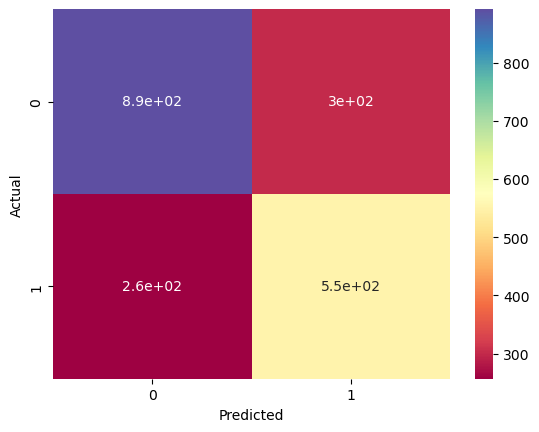

In [17]:
import seaborn as sns

conf_mat=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(conf_mat,annot=True,cmap='Spectral')

Spectral		 	Spectral_r	
Wistia		 	Wistia_r	
YlGn		 	YlGn_r	
YlGnBu		 	YlGnBu_r	
YlOrBr		 	YlOrBr_r	
YlOrRd		 	YlOrRd_r	
afmhot		 	afmhot_r	
autumn		 	autumn_r	
binary

In [19]:
#Pickle
import pickle
pickle.dump(model,open('DTCP.pkl','wb'))

In [21]:
data_new.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'SSC_Marks', 'HSC_Marks', 'PlacementStatus_new'],
      dtype='object')

In [ ]:
pic=pickle.load(open('DTCP.pkl','rb'))

CGPA=float(input("Enter the CGPA : "))
Intships=float(input("Enter the Internships values :  "))
proj=float(input("Enter the number of Projects : "))
work_cert=float(input("Enter the number of Workshops/Certifications : "))
api_test=float(input("Enter the AptitudeTestScore:  "))
ss=float(input("Enter the rating of 'SoftSkillsRating' : "))
sscmark=float(input("Enter the 'SSC_Marks': "))
HSCmark=float(input("Enter the 'HSC_Marks': "))

result=pic.predict([[CGPA,Intships,proj,work_cert,api_test,ss,sscmark,HSCmark]])

if result==0:
    print("Result :","PlacementStatus_new Not Elgible")

else:
    print("Result :","PlacementStatus_new Elgible")     #PlacementStatus_new
